# TP n°1 du Module 3 : les librairies Python pour le _Machine Learning_

Dans ce TP, nous allons explorer les 4 librairies présentées dans le cours. Objectifs :
* Savoir créer et récupérer des données avec _NumPy_ et _Pandas_
* Savoir interroger les données avec _Pandas_
* Savoir calculer des statistiques de base
* Produire des visualisations avec _Matplotlib_ (module _PyPlot_) et _Seaborn_

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Première partie : s'échauffer avec NumPy !
Commencons avec quelques exercices sur NumPy, qui vous permettront également de réviser certaines fonctionnalités de Python.

Pour rappel, toute la documentation NumPy est disponible en cliquant sur ce [lien](https://numpy.org/doc/stable/user/index.html)

### Question n°1
Créer une matrice `mat` 3x3 contenant tous les chiffres de 1 à 9, à l'aide des méthodes `arange` et `reshape`.

In [49]:
matrice = np.arange(1,10).reshape((3, 3))
matrice


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Question n°2
Écrire une fonction prenant en paramètre une matrice carré (de taille NxN, où N est un entier), et qui renvoie sa _trace_ (la somme des nombres sur la diagonale de la matrice), sans utiliser la méthode `trace` de _NumPy_. 

Puis, appliquez votre fonction à la matrice `mat` créée à la question précédente, et comparez le résultat avec la méthode `trace` de _NumPy_ pour valider votre fonction.

In [50]:
def trace(mat):
    result = 0
    for i in range(0, len(mat)):
        result+=[i][i]
    return result

### Question n°3
Créez une deuxième matrice `mat2`, de dimension 3x3 également, qui ne contient que des 1.

In [51]:
matrice1 = np.ones((3, 3), dtype=int)
matrice1

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

### Question n°4
Créez la matrice `vert`, qui consiste à empiler verticalement `mat` sur `mat2`.

Résultat attendu :
|   |   |   |
|---|---|---|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 | 9 |
| 1 | 1 | 1 |
| 1 | 1 | 1 |
| 1 | 1 | 1 |

In [52]:
vert = np.concatenate((matrice, matrice1))
vert

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

### Question n°5
Créez la matrice `hori`, qui consiste à coller horizontalement `mat` à `mat2`.

Résultat attendu :
|   |   |   |   |   |   |
|---|---|---|---|---|---|
| 1 | 2 | 3 | 1 | 1 | 1 |
| 4 | 5 | 6 | 1 | 1 | 1 |
| 7 | 8 | 9 | 1 | 1 | 1 |

In [53]:
hmatrice = np.hstack((matrice, matrice1))
hmatrice

array([[1, 2, 3, 1, 1, 1],
       [4, 5, 6, 1, 1, 1],
       [7, 8, 9, 1, 1, 1]])

### Question n°6
Écrire une fonction `less_than` qui prend en paramètre une matrice (`matrice`) et un nombre (`limite`), qui renvoie le nombre d'éléments de la matrice mais uniquement pour les éléments qui sont strictement inférieurs à ce nombre limite.

_Indice : Vous pouvez utiliser la méthode `count_nonzero` de NumPy._

In [54]:
def less_than(matParam, limit):
    return np.count_nonzero(matParam < limit)

less_than(hmatrice, 3)

11

## Partie 2 : manipuler un jeu de données
Après cet échauffement, nous allons passer à la manipulation d'un jeu de données, pour en commencer l'analyse, et pour produire des visualisations.

### Présentation du jeu de données
Pour ce TP (et les suivants), nous allons analyser les données d'un jeu de données sur les passagers du Titanic.

_Pour rappel, le RMS Titanic est un paquebot transatlantique britannique qui fait naufrage dans l'océan Atlantique Nord en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York.<br/>Entre 1 490 et 1 520 personnes trouvent la mort, ce qui fait de cet événement l'une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l'époque._

![Le Titanic à Southampton le 10 avril 1912. ](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/420px-RMS_Titanic_3.jpg)

Ce jeu de données est assez utilisé pour débuter dans le machine learning. Nous irons plus loin sur le prochain TP (module 4) dans son analyse, sur cette partie l'objectif est simplement de prendre en main Pandas, Matplotlib et Seaborn.

Les données contiennent un ensemble d'information sur ces passages (genre, âge, …), ainsi qu'un atribut sépcifiant s'ils ont ou non survécu au naufrage.

Pour vous aider, voilà un bref descriptifs des attributs du jeu de données :
|N°| Attribut | Explications |
|-:| :-- |:--: |
|0| PassengerId | N° de Passager |
|1| Survived | 0= Décédé, 1= Survivant |
|2| Pclass | 1= cabine 1ere classe, 2= cabine 2e classe, 3= cabine 3e classe |
|3| Name | Nom, Civilité. Prénom |
|4| Sex | _female_ = Femme, _male_ = Homme |
|5| Age |Âge (années) |
|6| SibSp | Nb. de frères, sœurs, et/ou conjoint |
|7| Parch | Nb. de parents et/ou enfant |
|8| Ticket | N° Ticket |
|9| Fare | Tarif du billet / Classe (£) |
|10| Cabin | Code de Cabine |
|11| Embarked | Port d'embarquement (C = Cherbourg; Q = Queenstown; S = Southampton) |
||||

### Pandas
Dans cette partie, chaque question ne nécessite qu'une seule ligne de code.

_Attention : n'oublier pas d'importer la librairie correspondant…_

#### Question n°1
Charger le jeu de données dans un Dataframe nommé `titanic` depuis l'adresse suivante :
- https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [55]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Question n° 2
Répondre à ces 3 questions (en une seule instruction) :
1. Combien de lignes comporte ce dataset ?
2. Combien de colonnes ?
3. Contient-il des valeurs nulles dans certaines colonnes ?

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Question n°3
Calculez les statistiques de base sur les colonnes numériques ce jeu de données

In [57]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Question n°4
Sélectionnez uniquement les colonnes `Survived` et `Age`

In [58]:
age_survived = titanic[['Survived', 'Age']]
age_survived

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,NaN
889,1,26.0


#### Question n°5
Sélectionner les informations sur le passager ayant occupé la cabine B78.

Résultat attendu : 
|    | PassengerId | Survived | Pclass |                                           Name |    Sex | Age | SibSp | Parch |   Ticket |     Fare | Cabin | Embarked |
|---:|------------:|---------:|-------:|-----------------------------------------------:|-------:|----:|------:|------:|---------:|---------:|------:|---------:|
| 31 | 32          | 1        | 1      | Spencer, Mrs. William Augustus (Marie Eugenie) | female | NaN | 1     | 0     | PC 17569 | 146.5208 | B78   | C        |

In [59]:
cabB478 = titanic[(titanic['Cabin'] == 'B78')]
cabB478

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


#### Question n°6
Sélectionnez uniquement les passagers âgés de plus de 30 ans (strictement), qui sont des femmes, qui voyageaient en première classe, et qui n'ont pas survécu.

Résultat attendu :
|     | PassengerId | Survived | Pclass |                       Name |    Sex |  Age | SibSp | Parch |   Ticket |    Fare | Cabin | Embarked |
|----:|------------:|---------:|-------:|---------------------------:|-------:|-----:|------:|------:|---------:|--------:|------:|---------:|
| 177 | 178         | 0        | 1      | Isham, Miss. Ann Elizabeth | female | 50.0 | 0     | 0     | PC 17595 | 28.7125 | C49   | C        |

In [60]:
woman_30_not_survived = titanic[(titanic['Age'] > 30) & (titanic['Sex'] == 'female') & (titanic['Pclass'] == 1) & (titanic['Survived'] == 0)]
woman_30_not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C


#### Question n°7
Trouver le nom des passagers qui sont montés à Cherbourg ou à Queenstown, qui voyageaient en 1e classe, avec au moins deux frère/soeurs/conjoints ?

Résultat attendu :
|     | PassengerId | Survived | Pclass |                                  Name |    Sex |  Age | SibSp | Parch |   Ticket |    Fare |           Cabin | Embarked |
|----:|------------:|---------:|-------:|--------------------------------------:|-------:|-----:|------:|------:|---------:|--------:|----------------:|---------:|
| 245 | 246         | 0        | 1      | Minahan, Dr. William Edward           | male   | 44.0 | 2     | 0     | 19928    | 90.000  | C78             | Q        |
| 311 | 312         | 1        | 1      | Ryerson, Miss. Emily Borie            | female | 18.0 | 2     | 2     | PC 17608 | 262.375 | B57 B59 B63 B66 | C        |
| 742 | 743         | 1        | 1      | Ryerson, Miss. Susan Parker "Suzette" | female | 21.0 | 2     | 2     | PC 17608 | 262.375 | B57 B59 B63 B66 | C        |

In [61]:
first_class = titanic[titanic['Embarked'].isin(["Q", "C"]) & (titanic['Pclass'] == 1) & (titanic['SibSp'] >= 2)]
first_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.000,C78,Q
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


#### Question n°8
Compter le nombre de femmes et d'hommes ayant survécu. (rappel : en une seule ligne de code !).

Résultat attendu :
|          Sex |     |
|-------------:|----:|
|    female    | 233 |
|     male     | 109 |
| dtype: int64 |     |

In [62]:
survivors = titanic[titanic['Survived'] == 1].groupby('Sex').size().rename("Nombres")
survivors

Sex
female    233
male      109
Name: Nombres, dtype: int64

#### Question n°9
Pour chaque classe, calculer la moyenne d'âge.

Résultat attendu :
|           Pclass          |           |
|:-------------------------:|----------:|
|             1             | 38.233441 |
|             2             | 29.877630 |
|             3             | 25.140620 |
| Name: Age, dtype: float64 |           |

In [63]:
average_age = titanic.groupby('Pclass')['Age'].mean()
average_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

#### Question n°10
Ajouter une colonne `FamilyMembers` au _DataFrame_ contenant les données du Titanic, qui représente le nombre total de personnes accompagnant chaque passager.
_(somme de `SibSp` et `Parch`)._

In [64]:
titanic['FamilyMembers'] = titanic['SibSp'] + titanic['Parch']
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


### MatPlotLib
Il est à présent temps de proposer quelques visualisations sur ce jeu de données. Pour les questions suivantes, il vous est demandé d'utiliser uniquement matplotlib (pyplot), même si des équivalences peuvent exister avec seaborn.

La documentation matplotlib est accessible à l'adresse suivante :
- https://matplotlib.org/stable/index.html

#### Question n°1
Afficher un graphe de type _scatterplot_, affichant l'âge des passagers en fonction du tarif de leurs tickets.

_Pensez à bien afficher un texte sur chaque axe, et ajouter un titre._

Text(0.5, 1.0, 'Âge des passagers par prix du ticket')

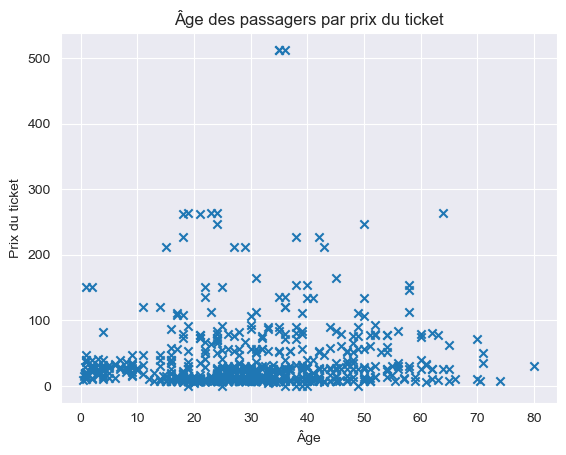

In [65]:


plt.scatter(titanic['Age'], titanic['Fare'], marker="x")
plt.xlabel("Âge")
plt.ylabel("Prix du ticket")
plt.title("Âge des passagers par prix du ticket")


#### Question n°2
Afficher un histogramme de type `barplot`, montrant pour chaque classe (1e, 2e et 3e), le nombre de passagers à bord du navire.

- Pensez à nommer vos axes et votre figure.
- Sur l'abscisse, seules les classes 1, 2 et 3 doivent apparaitre (pas de nombre décimal) :
    - si nécessaire, regarder dans la documention comment utiliser `xticks`.

([<matplotlib.axis.XTick at 0x1aec899a7e0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

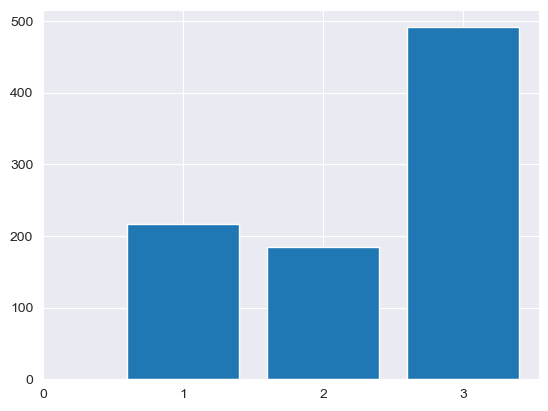

In [66]:

plt.bar((1, 2, 3), titanic.groupby('Pclass')['PassengerId'].count())
locs, labels = plt.xticks()
plt.xticks([0,1,2, 3], [0,1,2,3])

#### Question n°3
Proposez un graphique similaire au précédent, en représentant séparement pour chaque classe le nombre d'hommes et le nombre de femmes, sur deux barres côte à côte. Pensez à nommer vos axes, votre figure, et à afficher une légende expliquant quelle couleur représente les hommes, et laquelle représente les femmes.

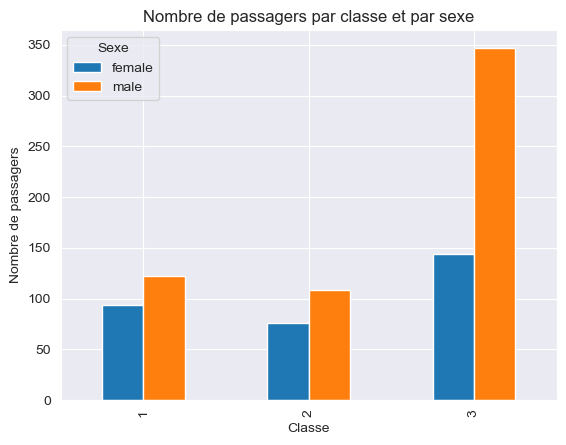

In [67]:
grouped = titanic.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)
grouped.plot(kind='bar')

plt.title('Nombre de passagers par classe et par sexe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Sexe')
plt.show()

#### Question n°4
Proposez un scatterplot montrant le nombre total de membres de la famille voyageant avec le passsagers (calculé à la question 10 de la section sur _Pandas_ nommé `FamilyMembers`), en fonction du tarif du ticket (sur l'axe y des ordonnées).

Colorez chaque point du graphique en fonction de si le passager a survécu ou non.

Affichez une légende expliquant ce code couleur, donnez un titre à vos axes, et ajoutez un titre à votre graphique.

In [68]:
#TODO

#### Question n°5
Proposez une figure composée de six sous-graphes, répartis sur 2 lignes et 3 colonnes.<br/>Chaque colonne représente un port d'embarquement.
- Sur la première ligne pour chaque port, représentez sur un _scatterplot_ de l'âge des passagers (axe des abscisses) en fonction du tarif de leur billet (axe des ordonnées).
- Sur la deuxième ligne pour chaque port, représentez un _barplot_ représentant le nombre de passagers de chaque genre.

In [69]:
#TODO

### Seaborn

Vous allez cette fois générer des visualisations uniquement avec Seaborn. La documentation est accessible à l'adresse suivante : https://seaborn.pydata.org/api.html

#### Question n°1
Proposez un _scatterplot_ de l'âge des passagers en fonction du tarif de leur ticket.
- Colorez chaque point en fonction du port dans lequel le passager à embarqué,
- Affichez une légende,
- Nommez vos axes,
- Affichez un titre pour votre graphique.

<Axes: xlabel='Age', ylabel='Fare'>

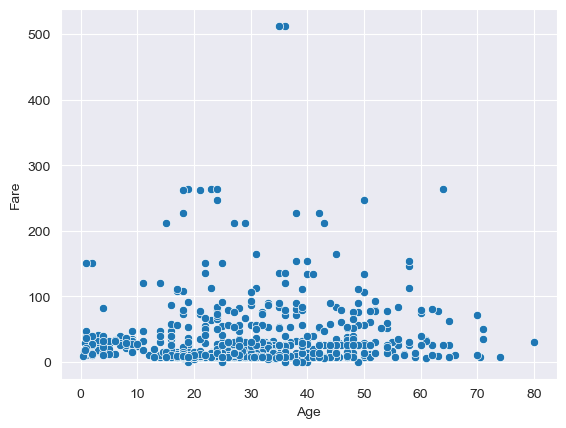

In [70]:
age_ticket = titanic[['Age', 'Fare']]
sns.scatterplot(data=titanic, x="Age", y="Fare")


#### Question n°2
Faire un _barplot_ représentant le nombre de passagers par genre.

_Indice : utilisez un `histplot`._

[Text(0.5, 1.0, 'NB. Passaengers per Gender')]

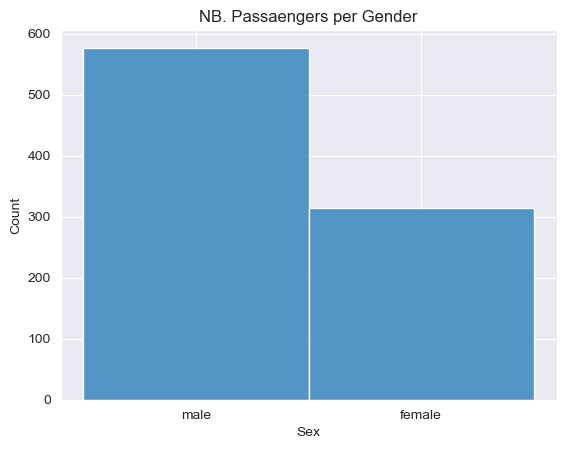

In [71]:
sns.histplot(data=titanic, x='Sex').set(title="NB. Passaengers per Gender")

#### Question n°3
Reproduire l'histogramme de la _Question n°3_ de la partie `MatPlotLib` - histogramme du nombre d'homme (_male_) et de femmes (_female_) pour chaque classe.

[Text(0.5, 1.0, 'Nb. Passengers par Gender and Class')]

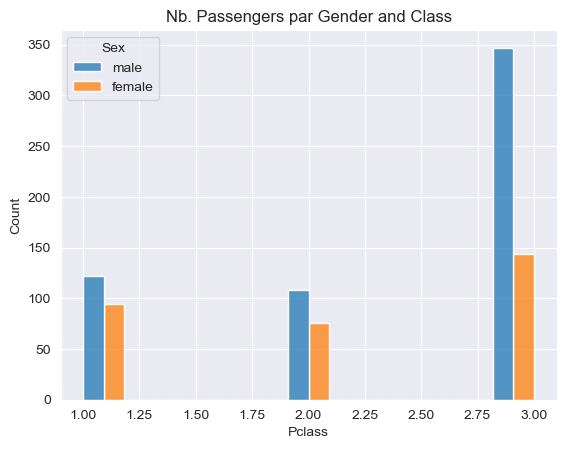

In [72]:
sns.histplot(data=titanic, x="Pclass", hue='Sex', multiple="dodge").set(title="Nb. Passengers par Gender and Class")

#### Question n°4
Proposer un _pairplot_ pour les colonnes suivantes : `Age` et `Fare`.

- Colorer chaque point en fonction de la survie des passagers.

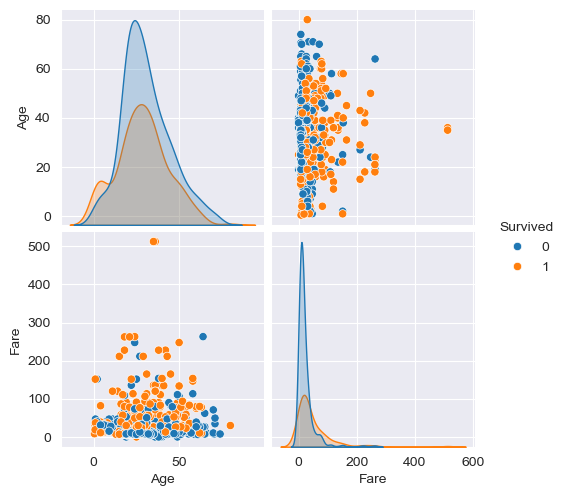

In [75]:
sns.pairplot(data=titanic[['Age', 'Fare', 'Survived']], hue='Survived')

#### Question n°5
En utilisant la fonction `corr` de _Pandas_, et la fonction `heatmap` de _Seaborn_, proposez une *heatmap* représentant la corrélation entre les attributs suivants : `Survived`, `Age`, `Pclass`, `FamilyMembers` (calculé par vos soins dans la partie _Pandas_), et `Fare`.

[Text(0.5, 1.0, 'Correlations')]

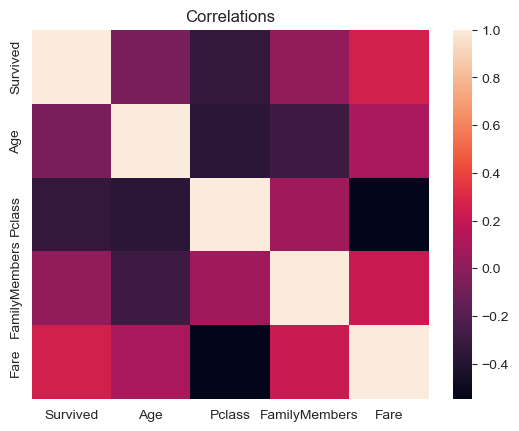

In [74]:
sns.heatmap(titanic[['Survived', 'Age', 'Pclass', 'FamilyMembers', 'Fare']].corr()).set(title='Correlations')

# Fin du TP !